#### 목표
 - 문제 정의
    - 500명의 키와 몸무게, 비만도 라벨을 이용하여 비만을 판단하는 모델을 만들어보자
    - 머신러닝 과정을 이해해보자

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#### 데이터 준비 (수집)


In [23]:
a = pd.read_csv(r'C:\Users\newny\Desktop\PythonScienceStudy\MachineLearning\data\bmi_500.csv',index_col='Label')
a

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


In [24]:
# 데이터 정보 확인해보기 => df.info()
# 전체 행, 컬럼 정보, 결측치 여부 확인
# desc a와 비슷한 역할을 한다
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


###### 데이터 전처리 : pass

#### 데이터 분석(탐색)
 - 기술 통계 확인 : 평균, 최소, 중앙값, 최대
 - 시각화

In [25]:
a.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [39]:
a.index.value_counts()

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: Label, dtype: int64

In [76]:
unique = a.index.unique()
unique.size

6

In [71]:
def bmi_draw(index, color):
    x = a.loc[index, 'Height']
    y = a.loc[index, 'Weight']
    plt.scatter(x, y, color=color, label=index, marker='o')  # scatter 그래프로 표시

In [59]:
x2 = a.loc['Extreme Obesity', 'Height']
y2 = a.loc['Extreme Obesity', 'Weight']

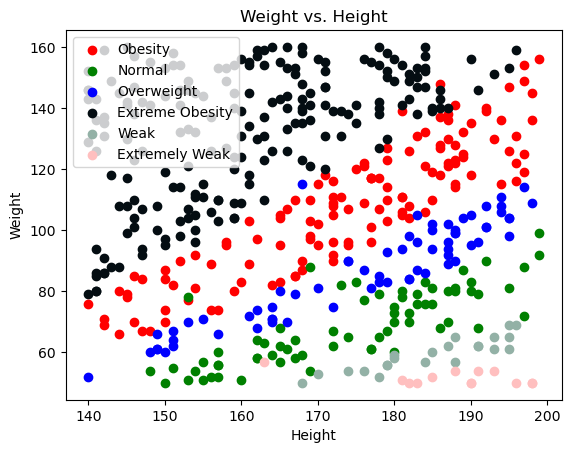

In [79]:
x = a.loc['Obesity', 'Height']
y = a.loc['Obesity', 'Weight']
color = ['r','g','b','#040D12', '#93B1A6', '#FFBFBF']
for i in range(unique.size):
    bmi_draw(unique[i], color[i])
    
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Weight vs. Height')
plt.legend()
plt.show()


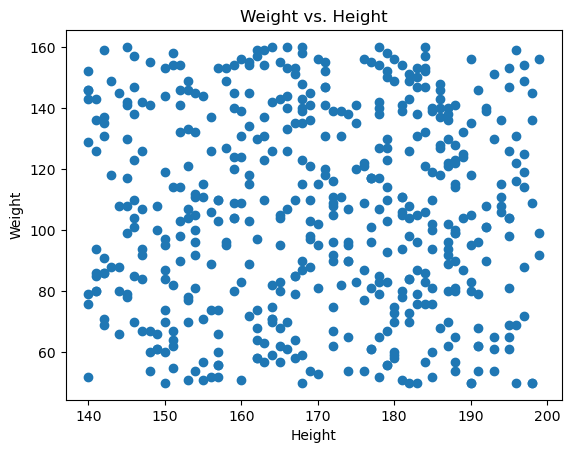

In [29]:
import matplotlib.pyplot as plt

x = a.loc[:, 'Height']
y = a.loc[:, 'Weight']
plt.scatter(x, y)  # scatter 그래프로 표시
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Weight vs. Height')
plt.show()


##### 모델링
 - 모델 선택 및 하이퍼 파라미터 조정(knn)
 - 모델 학습
 - 모델 예측 및 평가

In [81]:
# 행이 총 몇 개 ? 500
# train, test 데이터로 분리하는 비율
# 7:3
# X_train, y_train, X_test, y_test
# 문제, 답 ( 컬럼 분리)

def return_(index, color):
    x = a.loc[index, 'Height']
    y = a.loc[index, 'Weight']
    plt.scatter(x, y, color=color, label=index, marker='o')  # scatter 그래프로 표시

In [104]:
a = pd.read_csv('./data/bmi_500.csv', index_col = 'Label')

# 인덱스에 있는 label을 컬럼쪽으로 연결하기 (이동하기)
# 인덱스 초기화 : df.reset_index()
# 컬럼명 확인   : df.columns

a = a.reset_index()
a

,Label,Gender,Height,Weight
0,Obesity,Male,174,96
1,Normal,Male,189,87
2,Obesity,Female,185,110
3,Overweight,Female,195,104
4,Overweight,Male,149,61
...,...,...,...,...
495,Extreme Obesity,Female,150,153
496,Obesity,Female,184,121
497,Extreme Obesity,Female,141,136
498,Extreme Obesity,Male,150,95


In [124]:
y = a.loc[:, 'Label']
y_train = y.iloc[:350]
y_test = y.iloc[350:]
y_test
y_train

0              Obesity
1               Normal
2              Obesity
3           Overweight
4           Overweight
            ...       
345            Obesity
346             Normal
347             Normal
348    Extreme Obesity
349             Normal
Name: Label, Length: 350, dtype: object

In [114]:
x = a.loc[:, 'Height':'Weight']
x_train = x.iloc[:350]
x_test = x.iloc[350:]
x_test

,Height,Weight
350,184,83
351,197,88
352,160,51
353,184,153
354,190,50
...,...,...
495,150,153
496,184,121
497,141,136
498,150,95


In [126]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
pre = knn_model.predict(x_test)
pre # 예측 결과를 담은 변수

array(['Overweight', 'Normal', 'Normal', 'Extreme Obesity',
       'Extremely Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Weak', 'Extreme Obesity', 'Extreme Obesity',
       'Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Overweight',
       'Obesity', 'Extreme Obesity', 'Obesity', 'Overweight',
       'Extreme Obesity', 'Weak', 'Normal', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Obesity', 'Overweight',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Weak', 'Extreme Obesity', 'Obesity',
       'Overweight', 'Normal', 'Normal', 'Normal', 'Normal', 'Overweight',
       'Extreme Obesity', 'Overweight', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Obesity', 'Normal',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Weak',
       'Obesity', 'Extreme Obesity',

In [123]:
accuracy_score(y_test, pre) 

0.9